In [143]:
# Use Python 3.6, networkx 1.11
# Necessary...
import csv # to read CSV file
import networkx as nx # to make and analyze networks/graphs
import unicodedata # to compare strings while ignoring case
import matplotlib.pyplot as plt # to draw figures
from matplotlib.pyplot import figure # to draw figures
from tabulate import tabulate # to display markdown-compatible tables
import operator # to make sorting easier, using .itemgetter

# Function to ignore case, when searching for occurrences of definiendum and short definiendum in definiens.
def normalize_caseless(text):
    return unicodedata.normalize("NFKD", text.casefold())

In [145]:
# Get raw definitions from a CSV file
# Create empty raw_definitions, to hold definiendum, short definiendum (abbreviation of definiens), and definiens.
raw_definitions = []
# Fill raw_definitions as a list of triples, where a triple includes the definiendum, short definiendum, and definiens.
with open('ilang_UN_GWHT_terminology_raw - Sheet1.csv') as raw_definitions_file:
    raw_definitions_csv = csv.reader(raw_definitions_file, delimiter = ',')
    for row in raw_definitions_csv:
        raw_definitions.append({'definiendum':row[0], 'short definiendum':row[1], 'definiens':row[2]})

In [146]:
# Language as Network
# Create an empry term dependencies network, to hold dependencies of definitions on terms.
term_dependency_network = []
# Make the term dependency network as follows, and fill it into term_dependency_network:
# If a definiendum or short definendum A appears in a definiens of B, then definiendum B depends on definiendum A.
for i in raw_definitions:
    for j in raw_definitions:
        if (normalize_caseless(i['definiendum']) in normalize_caseless(j['definiens'])) or (normalize_caseless(i['short definiendum']) in normalize_caseless(j['definiens'])):
            term_dependency_network.append({'definiendum':j['definiendum'], 'depends on':i['definiendum']})
#             print(j['definiendum'], '--depends on->', i['definiendum'])

In [147]:
# Create a networkx graph to hold the term dependency network
tdn_graph = nx.DiGraph()
for i in term_dependency_network:
    tdn_graph.add_edge(i['definiendum'], i['depends on'], label = 'depends')

In [148]:
# Evaluate Term Importance
# Compute and show term importance, as count of edges entering that node (in degree)
nx.set_node_attributes(tdn_graph, values = tdn_graph.in_degree(), name = 'In degree')
in_degrees_data = list(nx.get_node_attributes(tdn_graph, 'In degree').items())
in_degrees_data.sort(key = operator.itemgetter(1))
print(tabulate(in_degrees_data, headers = ['Term', 'Used in'], tablefmt="pipe"))

| Term                                                                                                     |   Used in |
|:---------------------------------------------------------------------------------------------------------|----------:|
| Convention concerning the protection of the world cultural and natural heritage                          |         0 |
| Operational Guidelines for the Implementation of the World Heritage Convention                           |         0 |
| Nara Conference on Authenticity in Relation to the World Heritage Convention                             |         0 |
| Referral                                                                                                 |         0 |
| United Nations Educational, Scientific and Cultural Organization                                         |         0 |
| Young People's Participation in World Heritage Preservation and Promotion                                |         0 |
| Designed landscape            

In [149]:
# Evaluate Term Sensitivity to Change
# Compute and show term sensitivity to change, as count of edges exiting that node (out degree)
nx.set_node_attributes(tdn_graph, values = tdn_graph.out_degree(), name = 'Out degree')
out_degrees_data = list(nx.get_node_attributes(tdn_graph, 'Out degree').items())
out_degrees_data.sort(key = operator.itemgetter(1))
print(tabulate(out_degrees_data, headers = ['Term', 'Uses'], tablefmt="pipe"))

| Term                                                                                                     |   Uses |
|:---------------------------------------------------------------------------------------------------------|-------:|
| UNESCO                                                                                                   |      0 |
| Conditions of authenticity                                                                               |      1 |
| Nara Conference on Authenticity in Relation to the World Heritage Convention                             |      1 |
| Nara Document on Authenticity                                                                            |      1 |
| Test of authenticity                                                                                     |      1 |
| Designed landscape                                                                                       |      1 |
| Criterion                                             

Outstanding universal value is used in 16 terms.
| Term                                                                            | Uses                        |
|:--------------------------------------------------------------------------------|:----------------------------|
| Action Plan for the Future                                                      | Outstanding universal value |
| Outstanding universal value                                                     | Outstanding universal value |
| Convention concerning the protection of the world cultural and natural heritage | Outstanding universal value |
| World Heritage Committee                                                        | Outstanding universal value |
| Cultural landscapes                                                             | Outstanding universal value |
| Global Strategy                                                                 | Outstanding universal value |
| Tentative list                       

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):
/home/nbuser/ana

Outstanding universal value uses 18 terms.
| Term                        | Uses                        |
|:----------------------------|:----------------------------|
| Outstanding universal value | Bureau                      |
| Outstanding universal value | Committee                   |
| Outstanding universal value | Convention                  |
| Outstanding universal value | Criteria                    |
| Outstanding universal value | Evaluation                  |
| Outstanding universal value | Guidelines                  |
| Outstanding universal value | List                        |
| Outstanding universal value | Natural                     |
| Outstanding universal value | Natural heritage            |
| Outstanding universal value | Nomination                  |
| Outstanding universal value | Outstanding universal value |
| Outstanding universal value | Protection                  |
| Outstanding universal value | Sites                       |
| Outstanding universal val

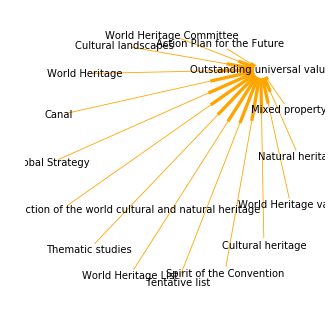

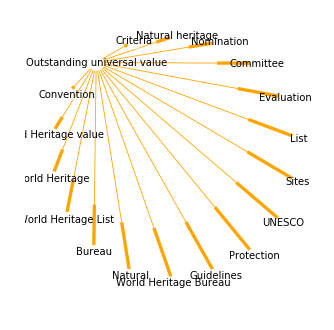

In [166]:
# Importance and Change Sensitivity Together
# Pick a single term to evaluate importance and change sensitivity of.
given_term = 'Outstanding universal value'

# STIN: Single Term Importance Network
# Build STIN, Single Term Importance Network, that includes only all edges which end in the given term.
stin = nx.DiGraph()
for i in tdn_graph.edges():
    if given_term == i[1]:
        stin.add_edge(i[0], i[1])

# Display STIN as markdown-compatible table
from tabulate import tabulate
stin_rows = []
for i in stin.edges():
    stin_rows.append((i[0], i[1]))
print(given_term, "is used in", len(stin_rows), "terms.")
print(tabulate(stin_rows, headers = ['Term', 'Uses'], tablefmt="pipe"))

# Draw STIN and save as PNG image
figure(num=None, figsize=(5, 5), dpi=60, facecolor='w', edgecolor='g')
pos = nx.spring_layout(stin, k=20)
nx.draw(stin, pos, arrows=True, with_labels=True, node_color='#FFFFFF', edge_color='#FFA500')
image_file_name = "%s_STIN.png" % given_term.replace(" ","_")
plt.savefig(image_file_name)

# TCSN: Term Change Sensitivity Network
# Build TCSN, Term Change Sensitivity Network, that includes only all edges which start in the given term.
tcsn = nx.DiGraph()
for i in tdn_graph.edges():
    if given_term == i[0]:
        tcsn.add_edge(i[0], i[1])

# Display TCSN as markdown-compatible table
from tabulate import tabulate
tcsn_rows = []
for i in tcsn.edges():
    tcsn_rows.append((i[0], i[1]))
print(given_term, "uses", len(tcsn_rows), "terms.")
print(tabulate(tcsn_rows, headers = ['Term', 'Uses'], tablefmt="pipe"))

# Draw TCSN and save as PNG image
figure(num=None, figsize=(5, 5), dpi=60, facecolor='w', edgecolor='g')
pos = nx.spring_layout(tcsn, k=20)
nx.draw(tcsn, pos, arrows=True, with_labels=True, node_color='#FFFFFF', edge_color='#FFA500')
image_file_name = "%s_TCSN.png" % given_term.replace(" ","_")
plt.savefig(image_file_name)

In [209]:
# Blowing Definitions Up
# Count words in all definitions, after defining stopwords, and cleaning up (remove punctuation and some other characters).
stopwords = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]
wordcount = {}
for i in raw_definitions:
    for word in i['definiens'].lower().split():
        word = word.replace(".","")
        word = word.replace(",","")
        word = word.replace(":","")
        word = word.replace("\"","")
        word = word.replace("!","")
        word = word.replace("â€œ","")
        word = word.replace("â€˜","")
        word = word.replace("*","")
        word = word.replace("(","")
        word = word.replace(")","")
        word = word.replace("/","")
        word = word.replace("-","")
        if word not in stopwords:
            if word not in wordcount:
                wordcount[word] = 1
            else:
                wordcount[word] += 1

# Make a list of words, and for each its count in all definiens.
sortable_wordcount = list(wordcount.items())
sortable_wordcount.sort(key = operator.itemgetter(1))

# Take only words which appear more than a threshold number of times.
high_wordcount = []
high_wordcount_threshold = 10
for i in sortable_wordcount:
    if i[1] > high_wordcount_threshold:
        high_wordcount.append(i)

# Show a table of high count words.
print(tabulate(high_wordcount, headers = ['Word', 'Count'], tablefmt="pipe"))

| Word           |   Count |
|:---------------|--------:|
| al             |      11 |
| preparatory    |      11 |
| 1992           |      11 |
| following      |      11 |
| april          |      11 |
| groups         |      11 |
| party          |      11 |
| activities     |      11 |
| measures       |      11 |
| 6              |      11 |
| made           |      11 |
| provide        |      11 |
| reporting      |      11 |
| session        |      12 |
| 39             |      12 |
| buildings      |      12 |
| area           |      12 |
| transmission   |      12 |
| ii             |      12 |
| term           |      12 |
| andor          |      12 |
| process        |      12 |
| available      |      12 |
| shall          |      12 |
| time           |      12 |
| towns          |      12 |
| 1994           |      13 |
| nature         |      13 |
| implementation |      13 |
| training       |      13 |
| clearly        |      13 |
| nominated      |      13 |
| 15          

In [210]:
# Filter the high wordcount list, to remove all words which appear in all defined terms (i.e., definiendum).
definiendum_words = []
for i in raw_definitions:
    definiendum_words = definiendum_words + i['definiendum'].lower().split()
filtered_high_wordcount = []
for i in high_wordcount:
    if i[0] not in definiendum_words:
                filtered_high_wordcount.append(i)

# Show a table of filtered high count words.
print(tabulate(filtered_high_wordcount, headers = ['Word', 'Count'], tablefmt="pipe"))

| Word        |   Count |
|:------------|--------:|
| al          |      11 |
| 1992        |      11 |
| following   |      11 |
| april       |      11 |
| party       |      11 |
| 6           |      11 |
| made        |      11 |
| provide     |      11 |
| session     |      12 |
| 39          |      12 |
| ii          |      12 |
| term        |      12 |
| andor       |      12 |
| process     |      12 |
| available   |      12 |
| shall       |      12 |
| time        |      12 |
| 1994        |      13 |
| nominated   |      13 |
| 15          |      13 |
| 3           |      13 |
| 5           |      13 |
| section     |      13 |
| adopted     |      14 |
| 24          |      14 |
| 8           |      14 |
| expert      |      15 |
| meeting     |      16 |
| held        |      16 |
| 2           |      17 |
| 11          |      18 |
| part        |      19 |
| definition  |      19 |
| also        |      20 |
| inscribed   |      20 |
| refers      |      21 |
| used      